# Decision Tree and Random Classifier Models

In [1]:
# 실습에 필요한 모듈 import

import numpy as np
import pandas as pd

# 시각화 모듈들
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Data Review

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
data.corr(numeric_only=True)

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


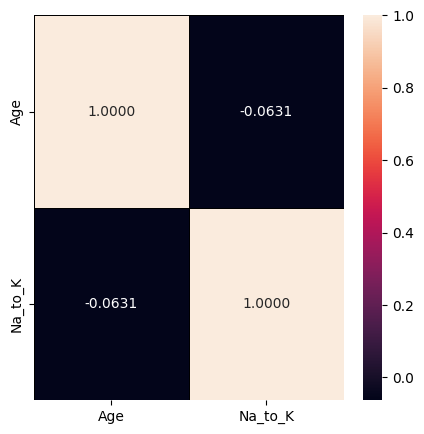

In [10]:
# visualization of correlation result with sns heatmap
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=0.5, linecolor="black", fmt=".4f", ax=ax)
plt.show()

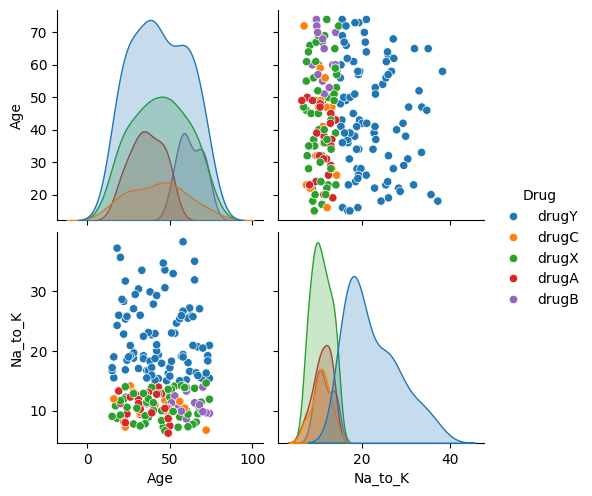

In [11]:
# visualization of correlation result with sns pairplot
sns.pairplot(data, hue="Drug")

In [12]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [14]:
# data in the age column
data["Age"].value_counts(dropna=False)

,count
Age,
47,8
23,7
28,7
49,7
32,6
39,6
50,5
60,5
22,5


In [15]:
# data in the sex column
data["Sex"].value_counts()

,count
Sex,
M,104
F,96


In [17]:
# data in the BP column
data["BP"].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [20]:
# data in the cholesterol column
data["Cholesterol"].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [21]:
# data in the drug column
data["Drug"].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


## Data Visualization

In [22]:
# visualize the number of age in the dataset
dataAge = data["Age"].value_counts(dropna=False)
npar_dataAge = np.array(dataAge) # Age 데이터만 뽑아서 벡터로 저장
x = list(npar_dataAge)
y = data.Age.value_counts().index # Age 데이터 종류에 인덱스 붙임

DataAge = {"Age": y, "Number": x} # 딕셔너리
DataAge = pd.DataFrame(DataAge)   # DF

fig = px.bar(DataAge, x="Age", y="Number")
fig.show()

In [23]:
# visualize the number of Sex in the dataset
colors = ['gold', 'mediumturquoise']

fig = go.Figure(data = [go.Pie(labels=['M','F'], values=[104, 96])]) # Plotly의 Figure 객체 생성
# go.Pie: 원형 차트 생성
## labels: 조각 이름  values: 조각 크기

fig.update_traces(hoverinfo='label + percent', textinfo='value',  # 그래프 스타일 & 정보 설정 업데이트
                  textfont_size=20, marker=dict(colors=colors, line=dict(color="#000000", width=2)))
fig.show()

In [24]:
# visualize the number of BP in the dataset
fig = px.bar(x=["HIGH", "LOW", "NORMAL"], y=[77,64,59])
fig.show()

In [25]:
# visualize the number of cholesterol in the dataset
fig = px.histogram(x=["HIGH", "NORMAL"], y=[103, 97])
fig.show()

In [26]:
# visualize the number of Drug in the dataset
fig = go.Figure(data=[go.Pie(labels=["DrugY", "DrugX", "DrugA", "DrugC", "DrugB"], values=[91,54,23,16,16])])
fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                  marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))
fig.show()

In [27]:
# visualize the relationship between age and Na_to_K
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug", size='Age', hover_data=['Na_to_K'])
fig.show()

## Classifications Models

### Data Preparing

In [28]:
# 데이터 전처리할 것이므로 변형한 데이터를 저장할 df 새롭게 생성
dataclass = pd.read_csv("/content/drive/MyDrive/Euron Homework/kaggle/drug200.csv")
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [29]:
# check object type
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
# change sex type
## F = 1, M = 0
dataclass.Sex = [1 if i=="F" else 0 for i in dataclass.Sex]
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [31]:
# change BP type
## LOW=2, NORMAL=1, HIGH=0

import warnings
warnings.filterwarnings('ignore')

dataclass['BP'] = dataclass['BP'].map({'LOW':2, 'NORMAL':1, 'HIGH':0}).astype(int)

In [32]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,drugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [33]:
# change Cholesterol type
## HIGH=1. NORMAL=0
dataclass.Cholesterol = [1 if i=="HIGH" else 0 for i in dataclass.Cholesterol]

In [34]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [35]:
# change Drug type
## Y=4, X=3, A=2, C=1, B=0

import warnings
warnings.filterwarnings('ignore')

### map을.. 써봄
dataclass['Drug'] = dataclass['Drug'].map({'drugY':4, 'drugX':3, 'drugA':2, 'drugC':1, 'drugB':0}).astype(int)

In [36]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [37]:
# check for possible unchanged types
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [38]:
# BP, Drug에 대해 형변환 해주기
data_types_dict = {'BP':int, 'Drug':int}
dataclass=dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [39]:
# x_data(피처), y_data(레이블) 추출

x_data = dataclass.iloc[:, :-1]
y_data = dataclass.Drug.values # numpy array로 추출됨

In [40]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [41]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [42]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) # 학습
predict = dtc.predict(X_test) # 예측

print('The accuracy of the Decision Tree is', metrics.accuracy_score(predict, y_test))

The accuracy of the Decision Tree is 0.9666666666666667


In [44]:
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
DTC_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [45]:
from sklearn.metrics import accuracy_score

y_pred_gini = DTC_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format
                                              (accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9000


In [46]:
y_pred_gini

array([3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 4, 4, 2, 2, 3, 3, 0, 4, 3, 3,
       3, 4, 0, 3, 3, 4, 3, 3, 3, 4, 4, 4, 2, 4, 2, 4, 4, 4, 0, 4, 4, 3,
       0, 4, 3, 3, 4, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2])

In [47]:
y_pred_train_gini = DTC_gini.predict(X_train) # 학습 데이터 예측

y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [48]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DTC_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTC_gini.score(X_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


In [49]:
# instantiate the DecisionTreeClassifier model with criterion entropy
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DTC_en.fit(X_train, y_train) # 학습

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [50]:
y_pred_en = DTC_en.predict(X_test)
print('Model accuracy score with criterion entropy index: {0:0.4f}'.format
                                              (accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy index: 0.9000


In [51]:
y_pred_train_en = DTC_gini.predict(X_train) # 학습 데이터 예측

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [52]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DTC_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DTC_en.score(X_test, y_test)))

Training set score: 0.9143
Test set score: 0.9000


### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train) # 학습
predict = rfc.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


In [54]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train) # 학습
predict = rfc_100.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test))

The accuracy of the Random Forest is 0.95


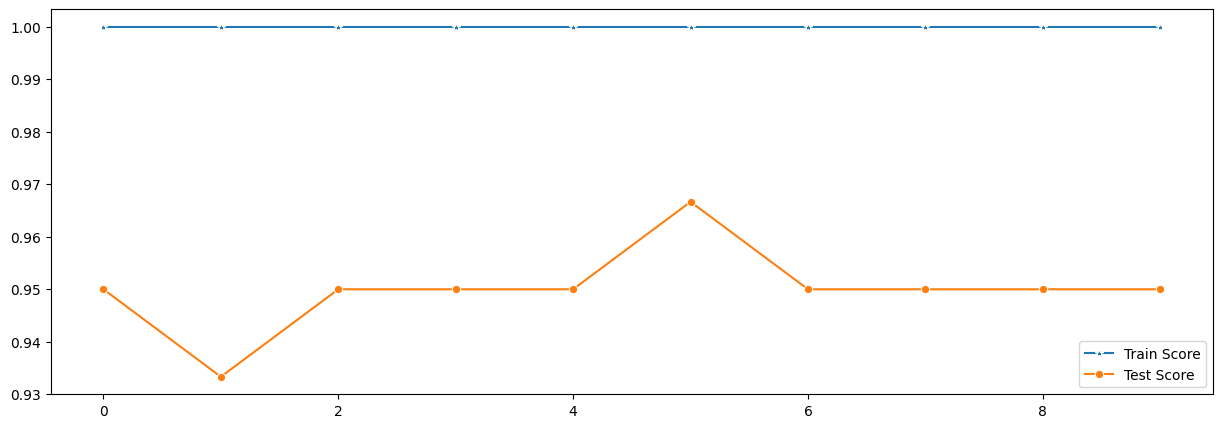

In [55]:
# find the best random_state value
test_score_list = []
train_score_list = []

for i in range(0, 10):
  rfc2 = RandomForestClassifier(random_state=i) # i값을 가지는 random_state
  rfc2.fit(X_train, y_train)
  test_score_list.append(rfc2.score(X_test, y_test))
  train_score_list.append(rfc2.score(X_train, y_train))

plt.figure(figsize=(15, 5))
# lineplot 그릴 때 x, y 인자 명확히 적어줘야 얘가 안 헷갈림
# positional argument(명시적 전달X 파라미터)는 0~1개만 허용
p = sns.lineplot(x=range(0,10), y=train_score_list, marker='*', label='Train Score')
p = sns.lineplot(x=range(0,10), y=test_score_list, marker='o', label='Test Score')

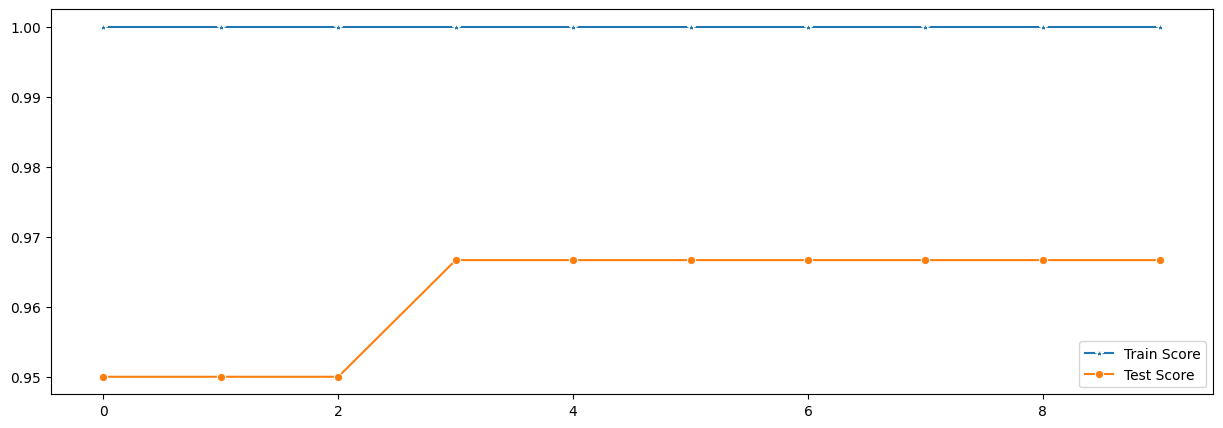

In [56]:
# find the best n_estimators parameter
test_score_list = []
train_score_list = []

list_n_estimators = range(10,101,10)

for i in list_n_estimators:
  rfc3 = RandomForestClassifier(n_estimators=i, random_state=5) # i값을 가지는 random_state
  rfc3.fit(X_train, y_train)
  test_score_list.append(rfc3.score(X_test, y_test))
  train_score_list.append(rfc3.score(X_train, y_train))

plt.figure(figsize=(15, 5))
# lineplot 그릴 때 x, y 인자 명확히 적어줘야 얘가 안 헷갈림
# positional argument(명시적 전달X 파라미터)는 0~1개만 허용
p = sns.lineplot(x=range(0,len(list_n_estimators)), y=train_score_list, marker='*', label='Train Score')
p = sns.lineplot(x=range(0,len(list_n_estimators)), y=test_score_list, marker='o', label='Test Score')

In [57]:
last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)
last_rfc.fit(X_train, y_train) # 학습
predict = last_rfc.predict(X_test) # 예측
print('The accuracy of the Random Forest is', accuracy_score(predict, y_test)) # 평가

The accuracy of the Random Forest is 0.9666666666666667


In [58]:
y_pred_en = last_rfc.predict(X_test)
print('Model accuracy score with best parameters: {0:0.4f}'.
                              format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with best parameters: 0.9667


In [59]:
y_pred_train_en = last_rfc.predict(X_train)
y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [60]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [61]:
# print the scores with best parameters on training and test set
print('Training set score: {:.4f}'.format(last_rfc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(last_rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9667


### Evaluation Classification Models

In [62]:
# confusion matrix for DecisionTreeClassifier without Parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cm_des = DecisionTreeClassifier()
cm_des.fit(X_train, y_train) # 학습
y_pred_cm = cm_des.predict(X_test) # 예측
y_true = y_test

cm_des1 = confusion_matrix(y_true, y_pred_cm)
print(cm_des1)

print()
print('y_true 모양새: ', y_true)

[[ 4  0  2  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

y_true 모양새:  [3 4 3 1 4 3 3 4 4 4 3 1 4 4 2 2 3 3 0 4 3 3 3 4 0 3 3 4 1 3 1 4 4 4 2 4 2
 4 4 4 0 4 4 3 0 4 3 3 4 0 4 4 4 4 4 4 3 3 3 0]


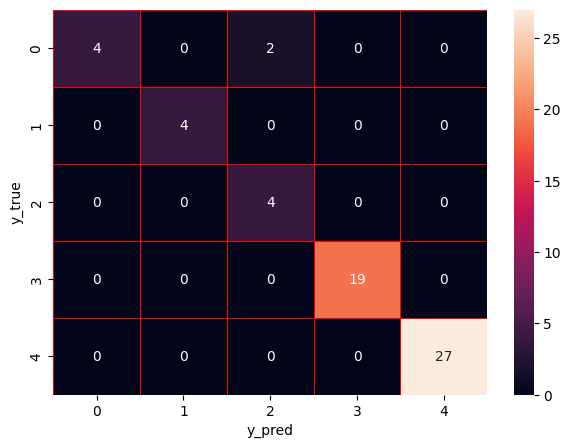

In [63]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des1, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [64]:
# Confusion Matrix for Decision Tree Classifier with "gini"
cm_des_gini=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cm_des_gini.fit(X_train, y_train) # 학습
y_pred_cm = cm_des_gini.predict(X_test) # 예측
y_true = y_test

cm_des2 = confusion_matrix(y_true, y_pred_cm)
print(cm_des2)

[[ 4  0  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


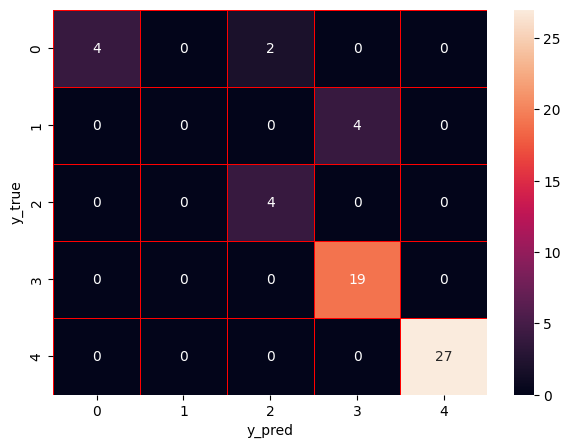

In [65]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des2, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [66]:
# confusion Matrix for Random Forest Classifier with the Best Parameters
cm_last_rfc = RandomForestClassifier(n_estimators=100, random_state=5)
cm_last_rfc.fit(X_train, y_train) # 학습
y_pred_cm = cm_last_rfc.predict(X_test) # 예측
y_true = y_test

cm_rfc = confusion_matrix(y_true, y_pred_cm) # confution matrix 객체
print(cm_rfc)

[[ 4  0  2  0  0]
 [ 0  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]


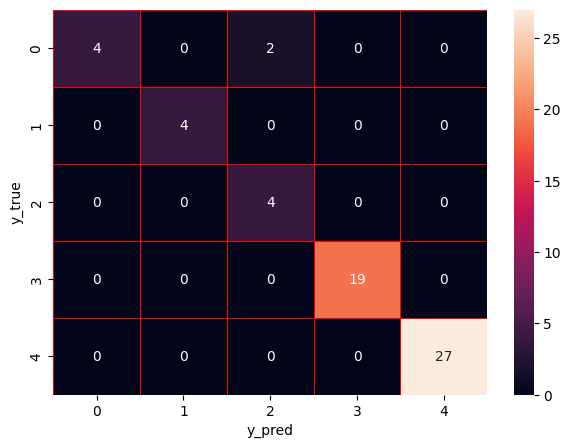

In [67]:
fm, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_rfc, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()